# <font color=green>Forex Market</font>

<font color=green>According to the 2019 Triennial Central Bank Survey of FX and OTC derivatives markets, the **foreign exchange or forex market** is the largest financial market in the world with a daily volume of **$6.6 trillion** This is even larger than the entire world's stock markets put together (approximately 84 billion for equities worldwide).<br>
<br>
Within this huge amount of **intraday transactions**. 70% are made by **institutional** investors with the remaning 30% made by private **retail** traders. The forex market is open 24 hours a day and 5 days a week, only closing down during the weekend<br>
<br>
sources
- https://www.bis.org/statistics/rpfx19_fx.htm
- https://www.babypips.com/learn/forex/what-is-forex</font>

## <font color=green>Buying and Selling Currencies Pairs</font>

<font color=green>Forex trading is the **simultaneous buying of one currency and selling another**. Currencies are traded through a broker or dealer and are **traded in pairs**. Currencies are quoted in relation to another currency. There are many pairs that can be traded. In this project, we will only focus on the most liquid and frequently traded **EURUSD** pair<br>
- If we believe the EUR will **appreciate** relative to USD, we will open a **BUY** or **LONG** trade.
    - If EUR **rises** against USD in the future, trader will close the trade with a **profit**
    - If EUR **falls** against USD in the future, trader will close the trade with a **loss**.
- If we believe the EUR will **depreciate** relative to USD, we will open a **SELL** or **SHORT** trade.
    - If EUR **rises** against USD in the future, trader will close the trade with a **loss**
    - If EUR **falls** against USD in the future, trader will close the trade with a **profit**.</font>

## <font color=green>Taking Profits and Stopping Losses</font>

<font color=green>When a trader opens a position. The price level at which the trade was open is call the **entry price**. Take Profit **(TP)** and Stop Loss **(SL)** are preset price levels where the open trade will be closed once those price levels are reached.<br>
- For long trades, TP are set above the entry price and SL is set below the entry price
- For short trades, TP are set below the entry price and SL is set above the entry price</font>
![](../images/metatrader4_stop_loss_take_profit__1.jpg)

## <font color=green>Risk-Reward Ratio</font>

<font color=green>It is impossible to profit at every trade. Traders objective is to accumulate more wins than losses (net positive) over any time period.<br>
<br>
One of the most popular method is to set TP and SL with ratio > 1. Even at win-rate significantly less than 50%, traders can still be profitable as long as their reward-risk ratio is high.<br> 
<br>
Of course the **caveat is that when SL is closer to the entry price, the probabilty of price reaching the the SL level is higher than reaching the TP level**.</font>
![](../images/Positive-RRR.jpg)
![](../images/RRR_winrate.png)

## <font color=green>Simulating Risk/Reward Ratio and Win Rates</font>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('whitegrid')

In [4]:
# function to return trade outcome based on win rate
def trade(win_rate):
    return 'profit' if np.random.random() < win_rate else 'loss'

In [33]:
trade_counts = 265

# 20% win rate
trades = [trade(0.2) for i in range(trade_counts)]
df = pd.DataFrame({'results_0p2':trades})
# 30% win rate
trades = [trade(0.3) for i in range(trade_counts)]
df['results_0p3'] = pd.DataFrame(trades)
# 40% win rate
trades = [trade(0.4) for i in range(trade_counts)]
df['results_0p4'] = pd.DataFrame(trades)
# 50% win rate
trades = [trade(0.5) for i in range(trade_counts)]
df['results_0p5'] = pd.DataFrame(trades)
# 60% win rate
trades = [trade(0.6) for i in range(trade_counts)]
df['results_0p6'] = pd.DataFrame(trades)

df.head()

,results_0p2,results_0p3,results_0p4,results_0p5,results_0p6
0,loss,profit,loss,loss,profit
1,loss,loss,profit,profit,loss
2,loss,loss,loss,loss,profit
3,loss,loss,loss,loss,loss
4,loss,profit,profit,profit,loss


In [34]:
# check win rates
print(df['results_0p2'].value_counts(normalize=True))
print("")
print(df['results_0p3'].value_counts(normalize=True))
print("")
print(df['results_0p4'].value_counts(normalize=True))
print("")
print(df['results_0p5'].value_counts(normalize=True))
print("")
print(df['results_0p6'].value_counts(normalize=True))
print("")

loss      0.788679
profit    0.211321
Name: results_0p2, dtype: float64

loss      0.686792
profit    0.313208
Name: results_0p3, dtype: float64

loss      0.592453
profit    0.407547
Name: results_0p4, dtype: float64

loss      0.532075
profit    0.467925
Name: results_0p5, dtype: float64

profit    0.618868
loss      0.381132
Name: results_0p6, dtype: float64



In [35]:
# define risk per trade at $10
risk = 10

In [36]:
# set reward-risk ratio at 2
reward_risk_ratio = 2

df["pnl_rrr2_wr0p2"]=df['results_0p2'].map({"profit": reward_risk_ratio*risk, "loss": (-1)*risk, })
df["pnl_rrr2_wr0p3"]=df['results_0p3'].map({"profit": reward_risk_ratio*risk, "loss": (-1)*risk, })
df["pnl_rrr2_wr0p4"]=df['results_0p4'].map({"profit": reward_risk_ratio*risk, "loss": (-1)*risk, })
df["pnl_rrr2_wr0p5"]=df['results_0p5'].map({"profit": reward_risk_ratio*risk, "loss": (-1)*risk, })
df["pnl_rrr2_wr0p6"]=df['results_0p6'].map({"profit": reward_risk_ratio*risk, "loss": (-1)*risk, })

df.head()

,results_0p2,results_0p3,results_0p4,results_0p5,results_0p6,pnl_rrr2_wr0p2,pnl_rrr2_wr0p3,pnl_rrr2_wr0p4,pnl_rrr2_wr0p5,pnl_rrr2_wr0p6
0,loss,profit,loss,loss,profit,-10,20,-10,-10,20
1,loss,loss,profit,profit,loss,-10,-10,20,20,-10
2,loss,loss,loss,loss,profit,-10,-10,-10,-10,20
3,loss,loss,loss,loss,loss,-10,-10,-10,-10,-10
4,loss,profit,profit,profit,loss,-10,20,20,20,-10


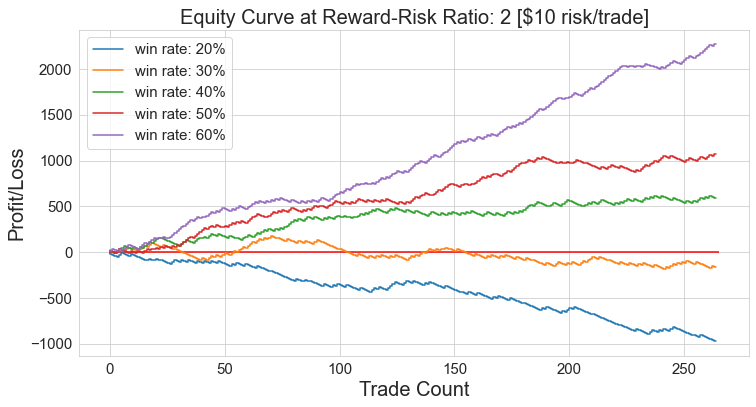

In [37]:
# plot equity curves
plt.figure(figsize=(12,6))

plt.plot(df.index, df['pnl_rrr2_wr0p2'].cumsum(), drawstyle='steps', label='win rate: 20%')
plt.plot(df.index, df['pnl_rrr2_wr0p3'].cumsum(), drawstyle='steps', label='win rate: 30%')
plt.plot(df.index, df['pnl_rrr2_wr0p4'].cumsum(), drawstyle='steps', label='win rate: 40%')
plt.plot(df.index, df['pnl_rrr2_wr0p5'].cumsum(), drawstyle='steps', label='win rate: 50%')
plt.plot(df.index, df['pnl_rrr2_wr0p6'].cumsum(), drawstyle='steps', label='win rate: 60%')

plt.xticks(fontsize=15);
plt.yticks(fontsize=15);
plt.xlabel("Trade Count", fontsize=20)
plt.ylabel("Profit/Loss", fontsize=20)
plt.title("Equity Curve at Reward-Risk Ratio: 2 [$10 risk/trade]", fontsize=20)
plt.legend(fontsize=15)
plt.hlines(y=0, xmin=0, xmax=265, color='r');

In [38]:
# set reward-risk ratio at 3
reward_risk_ratio = 3

df["pnl_rrr3_wr0p2"]=df['results_0p2'].map({"profit": reward_risk_ratio*risk, "loss": (-1)*risk, })
df["pnl_rrr3_wr0p3"]=df['results_0p3'].map({"profit": reward_risk_ratio*risk, "loss": (-1)*risk, })
df["pnl_rrr3_wr0p4"]=df['results_0p4'].map({"profit": reward_risk_ratio*risk, "loss": (-1)*risk, })
df["pnl_rrr3_wr0p5"]=df['results_0p5'].map({"profit": reward_risk_ratio*risk, "loss": (-1)*risk, })
df["pnl_rrr3_wr0p6"]=df['results_0p6'].map({"profit": reward_risk_ratio*risk, "loss": (-1)*risk, })

df.head()

,results_0p2,results_0p3,results_0p4,results_0p5,results_0p6,pnl_rrr2_wr0p2,pnl_rrr2_wr0p3,pnl_rrr2_wr0p4,pnl_rrr2_wr0p5,pnl_rrr2_wr0p6,pnl_rrr3_wr0p2,pnl_rrr3_wr0p3,pnl_rrr3_wr0p4,pnl_rrr3_wr0p5,pnl_rrr3_wr0p6
0,loss,profit,loss,loss,profit,-10,20,-10,-10,20,-10,30,-10,-10,30
1,loss,loss,profit,profit,loss,-10,-10,20,20,-10,-10,-10,30,30,-10
2,loss,loss,loss,loss,profit,-10,-10,-10,-10,20,-10,-10,-10,-10,30
3,loss,loss,loss,loss,loss,-10,-10,-10,-10,-10,-10,-10,-10,-10,-10
4,loss,profit,profit,profit,loss,-10,20,20,20,-10,-10,30,30,30,-10


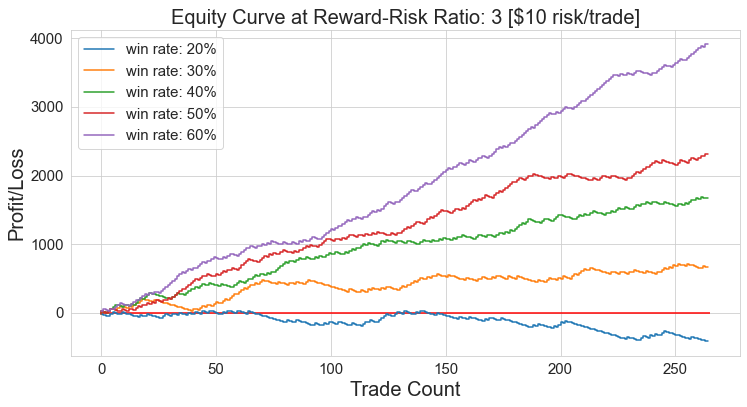

In [39]:
# plot equity curves
plt.figure(figsize=(12,6))

plt.plot(df.index, df['pnl_rrr3_wr0p2'].cumsum(), drawstyle='steps', label='win rate: 20%')
plt.plot(df.index, df['pnl_rrr3_wr0p3'].cumsum(), drawstyle='steps', label='win rate: 30%')
plt.plot(df.index, df['pnl_rrr3_wr0p4'].cumsum(), drawstyle='steps', label='win rate: 40%')
plt.plot(df.index, df['pnl_rrr3_wr0p5'].cumsum(), drawstyle='steps', label='win rate: 50%')
plt.plot(df.index, df['pnl_rrr3_wr0p6'].cumsum(), drawstyle='steps', label='win rate: 60%')

plt.xticks(fontsize=15);
plt.yticks(fontsize=15);
plt.xlabel("Trade Count", fontsize=20)
plt.ylabel("Profit/Loss", fontsize=20)
plt.title("Equity Curve at Reward-Risk Ratio: 3 [$10 risk/trade]", fontsize=20)
plt.legend(fontsize=15)
plt.hlines(y=0, xmin=0, xmax=265, color='r');